In [45]:
import pandas as pd
import numpy as np
from ipywidgets import *
import ipywidgets as widgets
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import game_finder as gf
import warnings
warnings.filterwarnings('ignore')



%matplotlib inline

In [46]:
game_recommender = gf.get_games
scores = gf.turn_to_percent
game_list = gf.all_games
game_list = list(game_list['name'].apply(lambda x : x.lower()))

In [47]:
user_choice = widgets.Text(continuous_update = False, description='Game:')

<h1>GameTraders INC would like to help you find a new game to play. Whats the last game you enjoyed playing?</h1>

In [51]:
display(user_choice)

Text(value='xxxx', continuous_update=False, description='Game:')

Button(description='Submit', style=ButtonStyle())

Output()

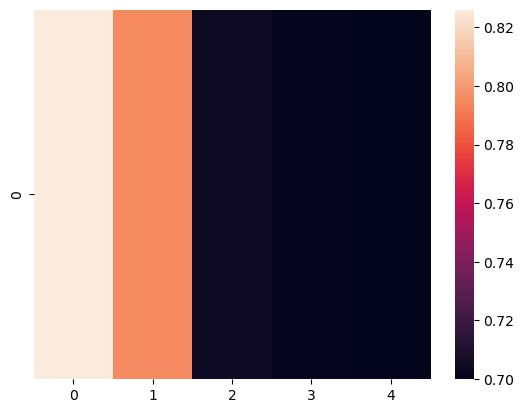

In [57]:
output = widgets.Output()
submit_button = widgets.Button(description = "Submit")
display(submit_button)

@output.capture(clear_output=True,wait=True,)
def on_button_clicked(game):
    if(user_choice.value.lower() in game_list ):
        df = pd.DataFrame(game_recommender(user_choice.value.lower()))
        sim_scores = scores(user_choice.value.lower())
        df['Percent'] = scores(user_choice.value.lower())
        df['Percent'] = df['Percent'].apply(lambda x: x*100)
        df['Percent'] = df['Percent'].apply(lambda x: int(x))
    
        sim_matrix = np.matrix(sim_scores)
    
    
        print('Here are the recommended titles for you!')
    
        display(df)
    
    
        plt.figure(figsize=(15,6)) 
        sns.barplot(x = 'name', y = 'Percent',data = df) 
        plt.show()
    
        plt.figure(figsize=(10,6)) 
        sns.scatterplot(x = 'name', y = 'Percent',data = df) 
        plt.show()
    
        sns.heatmap(sim_matrix)
        
    else:
        print('Sorry your game could not be found. Please try again!')
    
    
    

submit_button.on_click(on_button_clicked)

output

sys.version_info(major=3, minor=11, micro=5, releaselevel='final', serial=0)

sys.version_info(major=3, minor=11, micro=5, releaselevel='final', serial=0)
